In [ ]:
import glob
import json
import os

from algorithms.utilities.Utils import Utils
from algorithms.utilities.Stats import Stats

from algorithms.classical.floodfill.FloodFill import FloodFill
from algorithms.classical.bfs.BFS import BFS
from algorithms.classical.dijkstra.Dijkstra import Dijkstra
from algorithms.classical.astar.AStar import AStar

from algorithms.reinforcement_learning.sarsa.Sarsa import Sarsa
from algorithms.reinforcement_learning.q_learning.Qlearning import QLearning
from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning
from algorithms.reinforcement_learning.dynaq.DynaQSarsa import DynaQSarsa

from algorithms.ExploreMaze import ExploreMaze
import pandas as pd

In [ ]:
maze = Utils.load_maze('mazes/competition_json/87us1.json')

In [ ]:
sarsa = DynaQLearning(walls=maze)

In [ ]:
sarsa.run_dyna_qlearning()
sarsa_path = sarsa.get_path()

In [ ]:
Utils.draw_maze(walls=maze, dist_map=sarsa.get_max_q_values(), path = sarsa_path)

running agent 1
running agent 2
running agent 3
[]


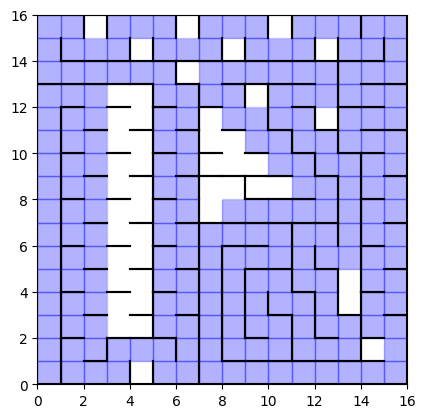

In [4]:
from algorithms.reinforcement_learning.q_learning.Qlearning import QLearning
from algorithms.utilities.Utils import Utils
maze = Utils.load_maze('mazes/competition_json/torture.json')
dyna_qlearning = QLearning(walls=maze)
dyna_qlearning.run_qlearning()
# dyna_qlearning.get_all_unfeasable()
print(dyna_qlearning.unfeasable_paths)
Utils.draw_maze(maze, unfeasable=dyna_qlearning.unfeasable_paths, path=dyna_qlearning.get_path())

In [5]:
from algorithms.utilities.Stats import Stats
stats = Stats()
stats.get_time_from_path(dyna_qlearning.path)

99.00028176549178

It is only failing when I run it to account for time taken and not with intervals. Discuss with supervisor what my next step should look like

running agent 1
episode: 0, steps: 1009
episode: 1, steps: 309
episode: 2, steps: 213
episode: 3, steps: 249
episode: 4, steps: 303
episode: 5, steps: 351
episode: 6, steps: 219
episode: 7, steps: 219
episode: 8, steps: 219
running agent 2
episode: 0, steps: 411
episode: 1, steps: 321
episode: 2, steps: 405
episode: 3, steps: 439
episode: 4, steps: 215
episode: 5, steps: 215
episode: 6, steps: 215
running agent 3
episode: 0, steps: 361
episode: 1, steps: 541
episode: 2, steps: 1101
episode: 3, steps: 329
episode: 4, steps: 557
episode: 5, steps: 1019
episode: 6, steps: 1611
episode: 7, steps: 1501
episode: 8, steps: 2821
episode: 9, steps: 3011
episode: 10, steps: 4193
episode: 11, steps: 4207
episode: 12, steps: 2627
episode: 13, steps: 4133
episode: 14, steps: 4435
episode: 15, steps: 3105
episode: 16, steps: 209
episode: 17, steps: 209
episode: 18, steps: 215
[(2, (0, 1)), (2, (0, 2)), (2, (0, 3)), (2, (0, 4)), (2, (0, 5)), (2, (0, 6)), (2, (0, 7)), (2, (0, 8)), (2, (0, 9)), (2, (0,

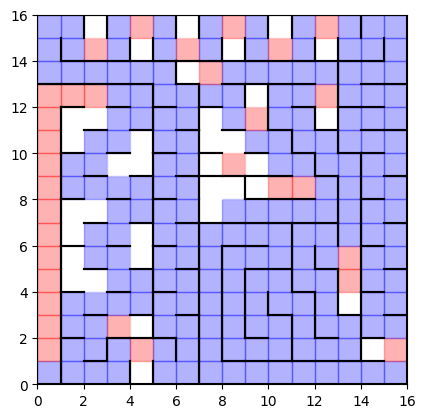

In [6]:
from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning, Utils
maze = Utils.load_maze('mazes/competition_json/torture.json')
dyna_qlearning = DynaQLearning(walls=maze)
dyna_qlearning.run_dyna_qlearning()
dyna_qlearning.get_all_unfeasable()
print(dyna_qlearning.unfeasable_paths) 
Utils.draw_maze(maze, unfeasable=dyna_qlearning.unfeasable_paths, path=dyna_qlearning.get_path())

Maybe need to add something to check if an agent fails, then run another quickly

In [ ]:
print(dyna_qlearning.goal_reward)

In [7]:
from algorithms.utilities.Stats import Stats
stats = Stats()
stats.get_time_from_path(dyna_qlearning.path)

99.78565642897131

In [ ]:

from algorithms.classical.floodfill.FloodFill import FloodFill
flood = FloodFill(walls=maze)
flood_path = flood.get_path_from_flood_map()
print(flood.get_stats())
Utils().draw_maze(walls=maze, path=flood_path, dist_map= flood.flood_map)
stats = Stats()
print(stats.get_time_from_path(flood_path))

In [ ]:
def get_mazes_json(dirname, maze_names):
    mazes = {}
    for maze_file in glob.glob(os.path.join(dirname, '*.json')):
        count = 0
        with open(maze_file, 'r') as f:
            maze_name = maze_file.split('\\')[1]
            maze_name = maze_name.split('.')[0]
            mazes[maze_name] = {eval(k): v for k, v in json.load(f).items()} 
    return mazes

In [ ]:
import os
import glob
import json

def get_mazes_json(dirname, maze_names):
    mazes = {}
    for maze_file in glob.glob(os.path.join(dirname, '*.json')):
        with open(maze_file, 'r') as f:
            maze_name = maze_file.split('\\')[1]
            maze_name = maze_name.split('.')[0]
            
            if maze_name in maze_names:  # Check if this maze name is in the list of names to load
                mazes[maze_name] = {eval(k): v for k, v in json.load(f).items()}
    return mazes

# Example usage:
maze_names = [
    'apec2011', 'apec2013', 'chochi', 'cut', 'diag2', 'kyushu-2017',
    'map-2', 'map-g4', 'minos03', 'other-world85fin-1985',
    'portugal-2017-qualifier', 'solver', 'song-2', 'sundo-1', 'supo1',
    'supo2', 'supo3', 'taiwan2009f', 'torture'
]

dirname = 'mazes/competition_json'  # Replace with your directory path
loaded_mazes = get_mazes_json(dirname, maze_names)



In [ ]:
loaded_mazes

In [ ]:
from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning, Utils
from algorithms.utilities.Stats import Stats
import time
def get_runtime(start_time):
    end_time = time.perf_counter_ns()
    return end_time - start_time

stats = Stats()
dyna_qlearning_paths = []
dyna_qlearning_path_times = []
dyna_qlearning_turns = []
dyna_qlearning_distances = []
dyna_qlearning_cells_travelled = []
dyna_qlearning_exec_time = []
dyna_qlearning_memory = []
dyna_qlearning_failed = []
for name, item in loaded_mazes.items():
    print(f'\nrunning {name}')
    start_time = time.perf_counter_ns()
    dyna_qlearning = DynaQLearning(walls=item)
    dyna_qlearning.run_dyna_qlearning()
    dyna_qlearning_exec_time.append(get_runtime(start_time) * pow(10, -3))
    path = dyna_qlearning.get_path()
    dyna_qlearning_paths.append(path)
    dyna_qlearning_path_times.append(stats.get_time_from_path(path))
    dist, turns = dyna_qlearning.get_stats()
    dyna_qlearning_cells_travelled.append(dist)
    dyna_qlearning_distances.append(stats.get_dist_travelled())
    dyna_qlearning_turns.append(turns)
    dyna_qlearning_memory.append(dyna_qlearning.total_memory_used)
    dyna_qlearning_failed.append(dyna_qlearning.fails)

maze_names = loaded_mazes.keys()

data = {
    'Maze Name': maze_names,
    'Path': dyna_qlearning_paths,
    'Path Time (s)': dyna_qlearning_path_times,
    'Turns': dyna_qlearning_turns,
    'Distance Travelled (m)': dyna_qlearning_distances,
    'Execution Time (micro secs)': dyna_qlearning_exec_time,
    'Memory Usage (MB)': dyna_qlearning_memory,
    'Cells Travelled': dyna_qlearning_cells_travelled,
    'Failed To Use Equations of Motion': dyna_qlearning_failed
}

In [ ]:
import pandas as pd
data_df = pd.DataFrame(data).set_index('Maze Name')


In [ ]:
maze_names = [
    'apec2011', 'apec2013', 'chochi', 'cut', 'diag2', 'kyushu-2017',
    'map-2', 'map-g4', 'minos03', 'other-world85fin-1985',
    'portugal-2017-qualifier', 'solver', 'song-2', 'sundo-1', 'supo1',
    'supo2', 'supo3', 'taiwan2009f', 'torture'
]

In [ ]:
data_df

In [ ]:
data_df[data_df['Failed To Use Equations of Motion'] == True]

In [ ]:
import os
import glob
import json

def get_mazes_json(dirname, maze_names):
    mazes = {}
    for maze_file in glob.glob(os.path.join(dirname, '*.json')):
        with open(maze_file, 'r') as f:
            maze_name = maze_file.split('\\')[1]
            maze_name = maze_name.split('.')[0]
            
            if maze_name in maze_names:  # Check if this maze name is in the list of names to load
                mazes[maze_name] = {eval(k): v for k, v in json.load(f).items()}
    return mazes

# Example usage:
maze_names = [
    'apec2011', 'apec2013', 'chochi', 'cut', 'diag2', 'kyushu-2017',
    'map-2', 'map-g4', 'minos03', 'other-world85fin-1985',
    'portugal-2017-qualifier', 'solver', 'song-2', 'sundo-1', 'supo1',
    'supo2', 'supo3', 'taiwan2009f', 'torture'
]

dirname = 'mazes/competition_json'  # Replace with your directory path
loaded_mazes = get_mazes_json(dirname, maze_names)


from algorithms.reinforcement_learning.dynaq.DynaQSarsa import DynaQSarsa
from algorithms.utilities.Stats import Stats
from algorithms.utilities.Utils import Utils
import time
def get_runtime(start_time):
    end_time = time.perf_counter_ns()
    return end_time - start_time

stats = Stats()
dyna_qlearning_paths = []
dyna_qlearning_path_times = []
dyna_qlearning_turns = []
dyna_qlearning_distances = []
dyna_qlearning_cells_travelled = []
dyna_qlearning_exec_time = []
dyna_qlearning_memory = []
# dyna_qlearning_failed = []
for name, item in loaded_mazes.items():
    print(f'\nrunning {name}')
    start_time = time.perf_counter_ns()
    dyna_qlearning = DynaQSarsa(walls=item)
    dyna_qlearning.run_dyna_sarsa()
    dyna_qlearning_exec_time.append(get_runtime(start_time) * pow(10, -3))
    path = dyna_qlearning.get_path()
    dyna_qlearning_paths.append(path)
    dyna_qlearning_path_times.append(stats.get_time_from_path(path))
    dist, turns = dyna_qlearning.get_stats()
    dyna_qlearning_cells_travelled.append(dist)
    dyna_qlearning_distances.append(stats.get_dist_travelled())
    dyna_qlearning_turns.append(turns)
    dyna_qlearning_memory.append(dyna_qlearning.total_memory_used)
    # dyna_qlearning_failed.append(dyna_qlearning.fails)

maze_names = loaded_mazes.keys()

data = {
    'Maze Name': maze_names,
    'Path': dyna_qlearning_paths,
    'Path Time (s)': dyna_qlearning_path_times,
    'Turns': dyna_qlearning_turns,
    'Distance Travelled (m)': dyna_qlearning_distances,
    'Execution Time (micro secs)': dyna_qlearning_exec_time,
    'Memory Usage (MB)': dyna_qlearning_memory,
    'Cells Travelled': dyna_qlearning_cells_travelled,
    # 'Failed To Use Equations of Motion': dyna_qlearning_failed
}

In [ ]:
import pandas as pd
data = {
    'Maze Name': maze_names,
    'Path': dyna_qlearning_paths,
    'Path Time (s)': dyna_qlearning_path_times,
    'Turns': dyna_qlearning_turns,
    'Distance Travelled (m)': dyna_qlearning_distances,
    'Execution Time (micro secs)': dyna_qlearning_exec_time,
    'Memory Usage (MB)': dyna_qlearning_memory,
    'Cells Travelled': dyna_qlearning_cells_travelled}

data_df = pd.DataFrame(data).set_index('Maze Name')

maze_names = [
    'apec2011', 'apec2013', 'chochi', 'cut', 'diag2', 'kyushu-2017',
    'map-2', 'map-g4', 'minos03', 'other-world85fin-1985',
    'portugal-2017-qualifier', 'solver', 'song-2', 'sundo-1', 'supo1',
    'supo2', 'supo3', 'taiwan2009f', 'torture'
]

In [2]:
import glob
import json
import os

from algorithms.utilities.Utils import Utils
from algorithms.utilities.Stats import Stats

from algorithms.classical.floodfill.FloodFill import FloodFill
from algorithms.classical.bfs.BFS import BFS
from algorithms.classical.dijkstra.Dijkstra import Dijkstra
from algorithms.classical.astar.AStar import AStar

from algorithms.reinforcement_learning.sarsa.Sarsa import Sarsa
from algorithms.reinforcement_learning.q_learning.Qlearning import QLearning
from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning
from algorithms.reinforcement_learning.dynaq.DynaQSarsa import DynaQSarsa

from algorithms.ExploreMaze import ExploreMaze
import pandas as pd

maze = Utils.load_maze('mazes/competition_json/alljapan-031-2010-exp-fin.json')


def get_mazes_json(dirname):
    mazes = {}
    for maze_file in glob.glob(os.path.join(dirname, '*.json')):
        with open(maze_file, 'r') as f:
            maze_name = maze_file.split('\\')[1]
            maze_name = maze_name.split('.')[0]
            mazes[maze_name] = {eval(k): v for k, v in json.load(f).items()}
    return mazes


mazes = get_mazes_json('mazes/competition_json')
import time


def get_runtime(start_time):
    end_time = time.perf_counter_ns()
    return end_time - start_time


remove_mazes = []
for name, item in mazes.items():
    try:
        flood = FloodFill(walls=item)
        path = flood.get_path_from_flood_map()
    except Exception as e:
        remove_mazes.append(name)

for name in remove_mazes:
    del mazes[name]

C:\Users\ACER\AppData\Local\Temp\ipykernel_15080\4182106061.py:19: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
stats = Stats()
sarsa_paths = []
sarsa_path_times = []
sarsa_turns = []
sarsa_distances = []
sarsa_cells_travelled = []
sarsa_exec_time = []
sarsa_memory = []
for name, item in mazes.items():
    print(f'running {name}')
    start_time = time.perf_counter_ns()
    sarsa = Sarsa(walls=item)
    sarsa.run_sarsa()
    sarsa_exec_time.append(get_runtime(start_time) * pow(10, -3))
    path = sarsa.get_path()
    sarsa_paths.append(path)
    sarsa_path_times.append(stats.get_time_from_path(path))
    dist, turns = sarsa.get_stats()
    sarsa_cells_travelled.append(dist)
    sarsa_distances.append(stats.get_dist_travelled())
    sarsa_turns.append(turns)
    sarsa_memory.append(sarsa.total_memory_used)

maze_names = mazes.keys()

data = {
    'Maze Name': maze_names,
    'Path': sarsa_paths,
    'Path Time (s)': sarsa_path_times,
    'Turns': sarsa_turns,
    'Distance Travelled (m)': sarsa_distances,
    'Execution Time (micro secs)': sarsa_exec_time,
    'Memory Usage (MB)': sarsa_memory,
    'Cells Travelled': sarsa_cells_travelled
}

sarsa_df = pd.DataFrame(data).set_index('Maze Name')
sarsa_df.to_csv('results/csv_files/competition/sarsa_using_arbitrary.csv')

running 13ye
running agent 1
running agent 2
running agent 3
running 50
running agent 1
running agent 2
running agent 3
running 86
running agent 1
running agent 2
running agent 3
running 87sin
running agent 1
running agent 2
running agent 3
running 87us1
running agent 1
running agent 2
running agent 3
running 88
running agent 1
running agent 2
running agent 3
running a
running agent 1
running agent 2
running agent 3
running AAMC15Maze
running agent 1
running agent 2
running agent 3
running AAMC16Maze
running agent 1
running agent 2
running agent 3
running AAMC17Maze
running agent 1
running agent 2
running agent 3
running AAMC18Maze
running agent 1
running agent 2
running agent 3
running AAMC22Maze
running agent 1
running agent 2
running agent 3
running AAMC23Maze
running agent 1
running agent 2
running agent 3
running AAMC24Maze
running agent 1
running agent 2
running agent 3
running AAMCUCLAMM2018
running agent 1
running agent 2
running agent 3
running allamerica2013
running agent 1
r

In [4]:
stats = Stats()
qlearning_paths = []
qlearning_path_times = []
qlearning_turns = []
qlearning_distances = []
qlearning_cells_travelled = []
qlearning_exec_time = []
qlearning_memory = []
for name, item in mazes.items():
    print(f'running {name}')
    start_time = time.perf_counter_ns()
    qlearning = QLearning(walls=item)
    qlearning.run_qlearning()
    qlearning_exec_time.append(get_runtime(start_time) * pow(10, -3))
    path = qlearning.get_path()
    qlearning_paths.append(path)
    qlearning_path_times.append(stats.get_time_from_path(path))
    dist, turns = qlearning.get_stats()
    qlearning_cells_travelled.append(dist)
    qlearning_distances.append(stats.get_dist_travelled())
    qlearning_turns.append(turns)
    qlearning_memory.append(qlearning.total_memory_used)

maze_names = mazes.keys()

data = {
    'Maze Name': maze_names,
    'Path': qlearning_paths,
    'Path Time (s)': qlearning_path_times,
    'Turns': qlearning_turns,
    'Distance Travelled (m)': qlearning_distances,
    'Execution Time (micro secs)': qlearning_exec_time,
    'Memory Usage (MB)': qlearning_memory,
    'Cells Travelled': qlearning_cells_travelled
}

qlearning_df = pd.DataFrame(data).set_index('Maze Name')
qlearning_df.to_csv('results/csv_files/competition/qlearning_using_arbitrary.csv')

running 13ye
running agent 1
running agent 2
running agent 3
running 50
running agent 1
running agent 2
running agent 3
running 86
running agent 1
running agent 2
running agent 3
running 87sin
running agent 1
running agent 2
running agent 3
running 87us1
running agent 1
running agent 2
running agent 3
running 88
running agent 1
running agent 2
running agent 3
running a
running agent 1
running agent 2
running agent 3
running AAMC15Maze
running agent 1
running agent 2
running agent 3
running AAMC16Maze
running agent 1
running agent 2
running agent 3
running AAMC17Maze
running agent 1
running agent 2
running agent 3
running AAMC18Maze
running agent 1
running agent 2
running agent 3
running AAMC22Maze
running agent 1
running agent 2
running agent 3
running AAMC23Maze
running agent 1
running agent 2
running agent 3
running AAMC24Maze
running agent 1
running agent 2
running agent 3
running AAMCUCLAMM2018
running agent 1
running agent 2
running agent 3
running allamerica2013
running agent 1
r